In [1]:
import numpy as np
import torch
from experiments import Model, Dataset
from experiment_mnist import MNISTModel
from experiment_svhn import SVHNModel
from etn import coordinates, networks, transformers
import matplotlib.pyplot as plt
from visualization import visualize_transformation

In [2]:
mnist_model_path = 'pretrained/etn-projmnist-8x.pt'
svhn_model_path = 'pretrained/etn-resnet34-svhn.pt'

In [3]:
# point to va
mnist_data_path = '/tmp/mnist/valid.pt'
svhn_data_path = '/tmp/svhn/valid.pt'

In [4]:
mnist_data = Dataset(path=mnist_data_path, 
                     normalization=(
                         MNISTModel.normalization_mean, 
                         MNISTModel.normalization_std))

In [5]:
svhn_data = Dataset(path=svhn_data_path, 
                    normalization=(
                        SVHNModel.normalization_mean, 
                        SVHNModel.normalization_std))

In [6]:
len(mnist_data), len(svhn_data)

(5000, 5000)

In [7]:
mnist_model = MNISTModel(load_path=mnist_model_path)
svhn_model = SVHNModel(load_path=svhn_model_path)

INFO:root:Projective MNIST classification
INFO:root:Loading model from file: pretrained/etn-projmnist-8x.pt -- using saved model configuration
INFO:root:Transformers: ShearX -> HyperbolicRotation -> PerspectiveX -> PerspectiveY
INFO:root:Pose module: EquivariantPosePredictor
INFO:root:Coordinate transformation before classification: logpolar_grid
INFO:root:Classifier architecture: BasicCNN
INFO:root:Net opts: {'nf': 32, 'p_dropout': 0.3, 'pad_mode': (None, 'cyclic'), 'pool': (True, True, False)}
INFO:root:Transformer opts: {'in_channels': 1, 'kernel_size': 3, 'nf': 32, 'strides': (2, 1)}
INFO:root:Street View House Numbers classification (single-digit)
INFO:root:Loading model from file: pretrained/etn-resnet34-svhn.pt -- using saved model configuration
INFO:root:Transformers: Translation -> RotationScale -> ScaleX
INFO:root:Pose module: EquivariantPosePredictor
INFO:root:Coordinate transformation before classification: identity_grid
INFO:root:Classifier architecture: resnet34
INFO:root

In [8]:
mnist_model.predict(mnist_data[0][0])

tensor([7.6409e-10, 4.0236e-08, 7.4891e-08, 1.2830e-05, 4.3974e-10, 5.1268e-07,
        9.1935e-08, 6.4793e-07, 9.9998e-01, 5.2573e-06], device='cuda:0')

In [9]:
mnist_model.predict(mnist_data[0][0], tf_output=True)

(tensor([7.6409e-10, 4.0236e-08, 7.4891e-08, 1.2830e-05, 4.3974e-10, 5.1268e-07,
         9.1935e-08, 6.4793e-07, 9.9998e-01, 5.2573e-06], device='cuda:0'),
 {'transform': [<etn.transformers.ProjectiveGridTransform at 0x7fabce34b3c8>,
  'params': [(tensor([-0.4792], device='cuda:0'),),
   (tensor([-0.0569], device='cuda:0'),),
   (tensor([-0.1442], device='cuda:0'),),
   (tensor([-0.4251], device='cuda:0'),)],
  'maps': [tensor([[0.0008, 0.0028, 0.0023, 0.0017, 0.0015, 0.0018, 0.0045, 0.0042, 0.0068,
            0.0101, 0.0133, 0.0903, 0.1310, 0.0263, 0.0422, 0.4164, 0.1054, 0.0476,
            0.0430, 0.0153, 0.0118, 0.0058, 0.0026, 0.0017, 0.0014, 0.0009, 0.0013,
            0.0022, 0.0019, 0.0009, 0.0009, 0.0013]], device='cuda:0'),
   tensor([[0.0457, 0.0898, 0.0175, 0.0247, 0.0379, 0.0478, 0.0353, 0.0286, 0.0412,
            0.0259, 0.0211, 0.0232, 0.0192, 0.0172, 0.0098, 0.0134, 0.0066, 0.0132,
            0.0196, 0.0215, 0.0224, 0.0185, 0.0251, 0.0594, 0.0431, 0.0267, 0.0195,
  

In [10]:
svhn_model.predict(svhn_data[0][0], tf_output=True)

(tensor([2.9485e-10, 1.0000e+00, 1.1126e-11, 2.4035e-10, 1.3005e-09, 2.0767e-08,
         5.4740e-10, 2.9430e-11, 4.6183e-12, 9.3443e-10], device='cuda:0'),
 {'transform': [<etn.transformers.ProjectiveGridTransform at 0x7fac280cb630>,
  'params': [(tensor([0.0177], device='cuda:0'),
    tensor([0.0144], device='cuda:0')),
   (tensor([-0.0639], device='cuda:0'), tensor([3.1931], device='cuda:0')),
   (tensor([-0.3517], device='cuda:0'),)],
  'maps': [(tensor([[0.0267, 0.0262, 0.0265, 0.0280, 0.0282, 0.0280, 0.0277, 0.0275, 0.0275,
             0.0279, 0.0279, 0.0270, 0.0260, 0.0291, 0.0393, 0.0473, 0.0495, 0.0419,
             0.0351, 0.0315, 0.0286, 0.0279, 0.0282, 0.0281, 0.0278, 0.0270, 0.0264,
             0.0273, 0.0355, 0.0385, 0.0383, 0.0379]], device='cuda:0'),
    tensor([[0.0065, 0.0084, 0.0098, 0.0158, 0.0249, 0.0321, 0.0364, 0.0387, 0.0403,
             0.0410, 0.0408, 0.0406, 0.0404, 0.0407, 0.0413, 0.0414, 0.0411, 0.0410,
             0.0406, 0.0404, 0.0402, 0.0400, 0.0390

example index = 144


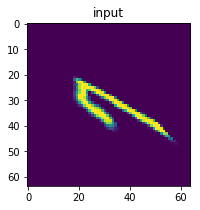

ShearX
predicted parameter(s) = [0.9319121241569519]


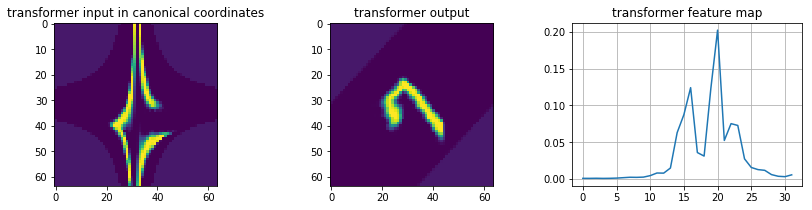

HyperbolicRotation
predicted parameter(s) = [-0.05437764525413513]


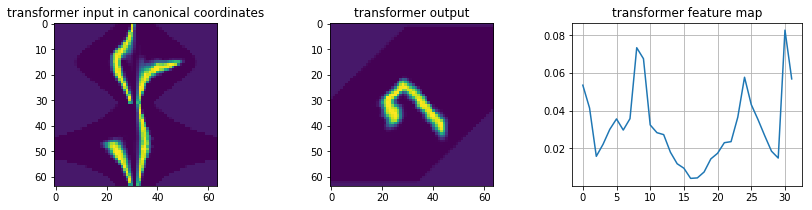

PerspectiveX
predicted parameter(s) = [0.07103900611400604]


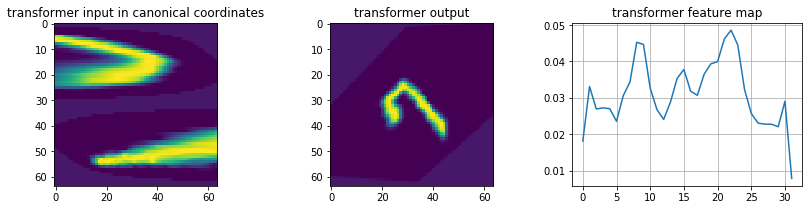

PerspectiveY
predicted parameter(s) = [-0.09105794131755829]


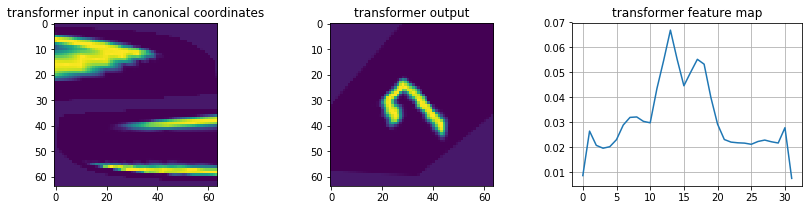

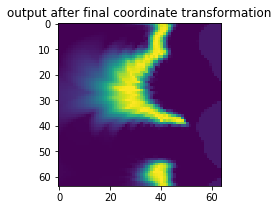

In [16]:
idx = np.random.randint(len(mnist_data))
print('example index =', idx)
visualize_transformation(
    mnist_data[idx][0], 
    mnist_model)

example index = 3980


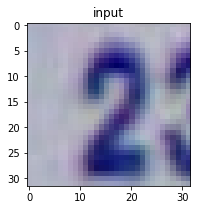

Translation
predicted parameter(s) = [0.03359904885292053, 0.06179988011717796]


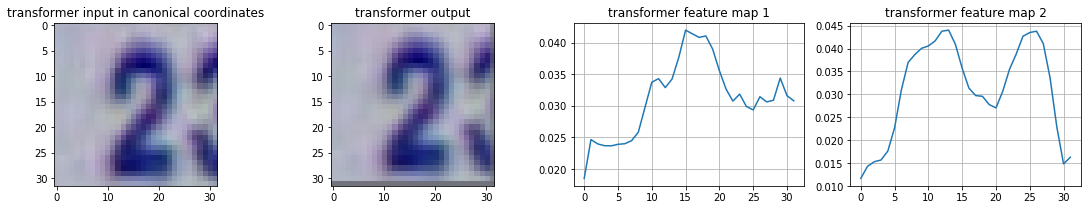

RotationScale
predicted parameter(s) = [-0.05370337516069412, -3.070885181427002]


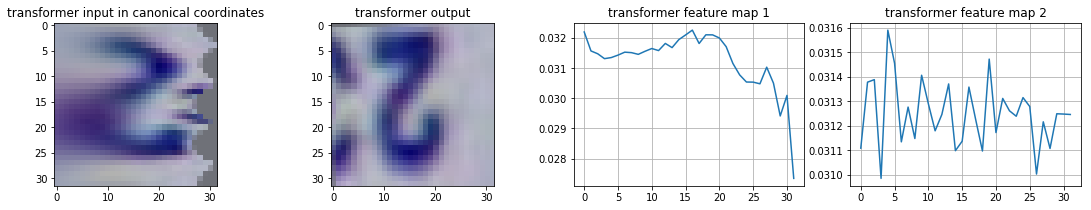

ScaleX
predicted parameter(s) = [-0.4316267669200897]


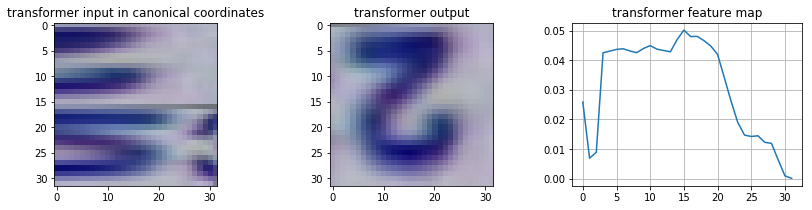

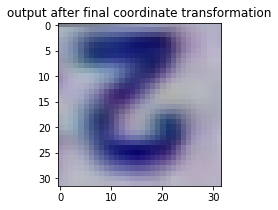

In [12]:
idx = np.random.randint(len(svhn_data))
print('example index =', idx)
visualize_transformation(svhn_data[idx][0], svhn_model)